<a href="https://colab.research.google.com/github/aslla77/opencv/blob/main/OpenCV_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#OpenCV2 and Deeplearning

- 직접 쓴 글씨를 OpenCV를 이용하여 숫자마다 각자 구분을 하고
- CNN을 이용하지 않고 그 값들이 옳게 나오는지 확인 한다.

In [ ]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns

#밑에는 CNN의 모델을 생성하고 저장 하는 머신러닝 돌리는 코드

In [ ]:
mnist=tf.keras.datasets.mnist

(x_train,t_train),(x_test,t_test)=mnist.load_data()

x_train,x_test=x_train.reshape(-1,28,28,1),x_test.reshape(-1,28,28,1)

x_train,x_test=x_train/255.,x_test/255.


In [ ]:

input_=tf.keras.layers.Input(shape=(28,28,1))
# x=tf.keras.layers.Conv2D(32,3,activation='relu')(input_)
# x=tf.keras.layers.Conv2D(64,3,activation='relu')(x)
# x=tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)
# x=tf.keras.layers.Dropout(0.25)(x)

# x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Flatten()(input_)
x=tf.keras.layers.Dense(128,activation='relu')(x)
x=tf.keras.layers.Dropout(0.5)(x)
x=tf.keras.layers.Dense(50,activation='relu')(x)
x=tf.keras.layers.Dropout(0.25)(x)

output_=tf.keras.layers.Dense(10,activation='softmax')(x)

cnn=tf.keras.models.Model(inputs=input_,outputs=output_)

cnn.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 50)                6450      
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_9 (Dense)             (None, 10)                510 

In [ ]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

hist=cnn.fit(x_train,t_train,batch_size=128,epochs=30,validation_data=(x_test,t_test))

Epoch 1/30
469/469 [==============================] - 2s 4ms/step - loss: 0.6351 - accuracy: 0.8009 - val_loss: 0.2114 - val_accuracy: 0.9342
Epoch 2/30
469/469 [==============================] - 2s 3ms/step - loss: 0.3123 - accuracy: 0.9085 - val_loss: 0.1600 - val_accuracy: 0.9513
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2532 - accuracy: 0.9259 - val_loss: 0.1406 - val_accuracy: 0.9577
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2229 - accuracy: 0.9354 - val_loss: 0.1247 - val_accuracy: 0.9646
Epoch 5/30
469/469 [==============================] - 1s 3ms/step - loss: 0.2022 - accuracy: 0.9406 - val_loss: 0.1130 - val_accuracy: 0.9666
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1909 - accuracy: 0.9433 - val_loss: 0.1073 - val_accuracy: 0.9679
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1758 - accuracy: 0.9474 - val_loss: 0.1005 - val_accuracy: 0.9710
Epoch 

In [ ]:
cnn.evaluate(x_test,t_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0812 - accuracy: 0.9769


[0.08117036521434784, 0.9768999814987183]

In [ ]:
cnn.save('MODEL_CV.h5')

#여기까지 모델을 저장한 후에 opencv를이용하여 문제를 풀 예정

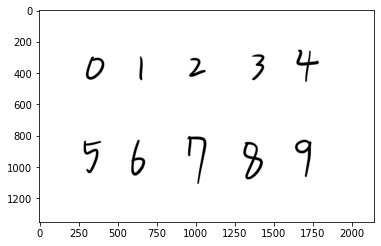

In [ ]:
filename='/content/drive/MyDrive/IMG_DC6749D00BD0-1.jpeg'

img=cv2.imread(filename)
plt.imshow(img)
plt.show()

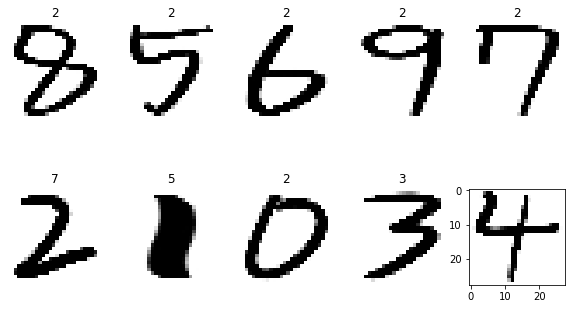

In [ ]:
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,binary_img=cv2.threshold(gray_img,170,255,cv2.THRESH_BINARY_INV)

plt.show()
contours, hierarchy = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

plt.figure(figsize=(10,30))

for i in range(len(contours)):
  x,y,w,h=cv2.boundingRect(contours[i]) #테두리 값 출력
  test_img=np.array([cv2.resize(img[y-10:y+h+10,x-10:x+w+10],(28,28))]).reshape(-1,28,28,1)
  
  pred=cnn.predict(test_img)
  title_str = np.argmax(pred)
  plt.axis('off')
  plt.title(title_str)
  plt.subplot(10,5,i+1)
  plt.imshow(test_img.reshape(28,28,3))

plt.show()

#위에 방식으로 하면 이미지가 늘어나게 되었다.

In [ ]:
def firstdata(img1):

  img_gray=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

  img_blur= cv2.GaussianBlur(img_gray,(5,5),0)

  ret,img_th=cv2.threshold(img_blur,175,255,cv2.THRESH_BINARY_INV)

  contours,hierachy=cv2.findContours(img_th.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

  rects=[cv2.boundingRect(each) for each in contours]

  rects=sorted(rects)

  return img_blur,rects

In [ ]:
def resizeimg(img_blur,rects):
  img_class=img_blur.copy()

  mnist_imgs=[]
  margin_pixel=3

  for rect in rects:
    x,y,w,h=rect[0],rect[1],rect[2],rect[3]
    im=img_class[y-margin_pixel:y+h+margin_pixel,
                x-margin_pixel:x+w+margin_pixel]
    row,col=im.shape[:2]

    #정방향 비율을 맞추기
    bordersize=max(row,col)
    diff=min(row,col)

    bottom=im[row-2:row,0:col]
    mean=cv2.mean(bottom)[0]

    border=cv2.copyMakeBorder(
        im,
        top=0,
        bottom=0,
        left=int((bordersize-diff)/2),
        right=int((bordersize-diff)/2),
        borderType=cv2.BORDER_CONSTANT,
        value=[mean,mean,mean]

    )
    square=border
    resized_img=cv2.resize(square,dsize=(28,28),
                          interpolation=cv2.INTER_AREA)
    mnist_imgs.append(resized_img)
  return mnist_imgs

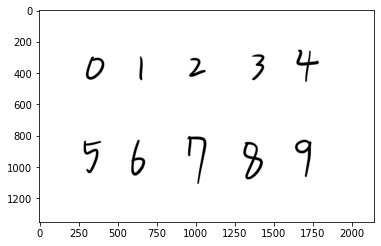

In [ ]:
filename='/content/drive/MyDrive/IMG_DC6749D00BD0-1.jpeg'

img=cv2.imread(filename)
plt.imshow(img)
plt.show()

In [ ]:
imgblur,rests=firstdata(img)

mnist_imgs=resizeimg(imgblur,rests)


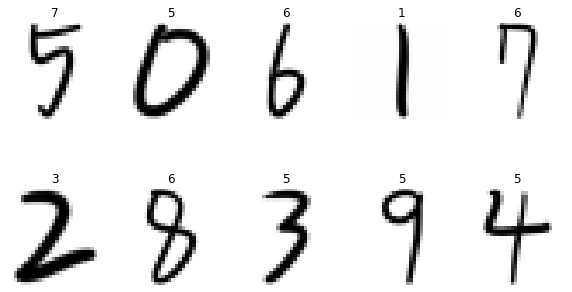

In [ ]:

plt.figure(figsize=(10,30))

for i in range(len(mnist_imgs)):
  img=mnist_imgs[i]
  plt.subplot(10,5,i+1)
  plt.imshow(img,cmap='gray')

  img=img.reshape(-1,28,28,1)

  input_data_=((np.array(img)/255)-1)*-1
  res=np.argmax(cnn.predict(input_data_))
  title_str = res
  plt.axis('off')
  plt.title(title_str)
  
plt.show()

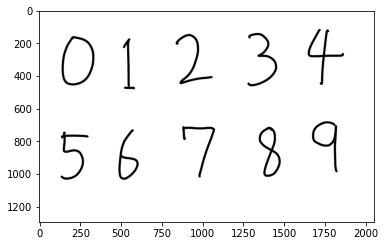

In [ ]:
filename2='/content/drive/MyDrive/IMG_EEC1E1604FE8-1.jpeg'
img2=cv2.imread(filename2)
plt.imshow(img2)
plt.show()

In [ ]:
imgblur1,rests1=firstdata(img2)

mnist_imgs1=resizeimg(imgblur1,rests1)

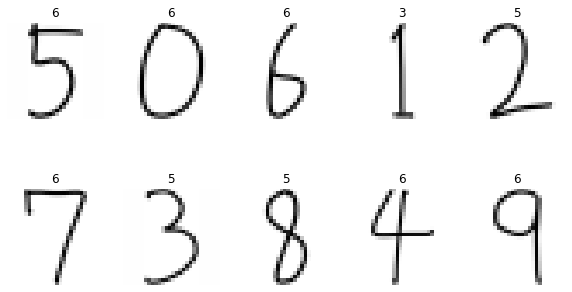

In [ ]:
plt.figure(figsize=(10,30))

for i in range(len(mnist_imgs1)):
  img=mnist_imgs1[i]
  plt.subplot(10,5,i+1)
  plt.imshow(img,cmap='gray')

  img=img.reshape(-1,28,28,1)

  input_data_=((np.array(img)/255)-1)*-1
  res=np.argmax(cnn.predict(input_data_))
  title_str = res
  plt.axis('off')
  plt.title(title_str)
  
plt.show()